### Reference: Deep Learning by Francois Chollet

A Linear Classifier is used to seperate sample points using a straight line or in higher dimensional cases a hyperplane. The end result of this example is as below:

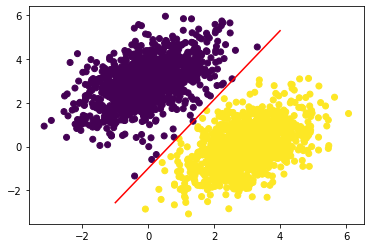

In [15]:
# Do not run this code at first, it is the final result after training the classifier.
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [1]:
import numpy as np
import tensorflow as tf

#### Generating two classes of random points in a 2D plane

In [2]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)


#### Stacking the two classes into an array with shape (2000, 2)

In [3]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

#### Generating the corresponding targets (0 and 1)

In [4]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

#### Plotting the two point classes

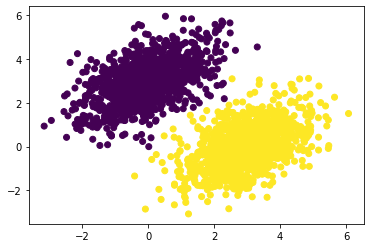

In [5]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

#### Creating the linear classifier variables

In [6]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


#### The forward pass function

The linear model has the form, 

$$
\hat{y} = XW + b
$$

where $W$ denotes the initial weights of each input and $b$ is the bias vector. 

In [7]:
def model(inputs):
    return tf.matmul(inputs, W) + b


#### The Mean Squared Error(MSE) Loss Function

Here we will use MSE as our loss function, which is given by,

$$
MSE_{test} = \frac{1}{m} \sum_{i} (\hat{y}^{(test)} - y^{(test)})^{2}_{i} = \frac{1}{m} \sum_{i} \big\| (\hat{y}^{(test)} - y^{(test)}) \big\|^{2}_2
$$

In [8]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)


#### Minimizing the Loss Function Using GradientTape

Next we find the partial derivative of the MSE with respect to each of the weights and biases, using the GradientTape object, and then subtract the gradient multiplied by a predefined learning rate to slowly minimize the loss function. 

In [9]:
learning_rate = 0.1


def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss


#### The batch training loop

In [10]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")


Loss at step 0: 4.6634
Loss at step 1: 0.4410
Loss at step 2: 0.1660
Loss at step 3: 0.1293
Loss at step 4: 0.1175
Loss at step 5: 0.1090
Loss at step 6: 0.1015
Loss at step 7: 0.0946
Loss at step 8: 0.0884
Loss at step 9: 0.0827
Loss at step 10: 0.0776
Loss at step 11: 0.0729
Loss at step 12: 0.0686
Loss at step 13: 0.0648
Loss at step 14: 0.0612
Loss at step 15: 0.0580
Loss at step 16: 0.0551
Loss at step 17: 0.0524
Loss at step 18: 0.0500
Loss at step 19: 0.0478
Loss at step 20: 0.0458
Loss at step 21: 0.0440
Loss at step 22: 0.0423
Loss at step 23: 0.0408
Loss at step 24: 0.0394
Loss at step 25: 0.0382
Loss at step 26: 0.0370
Loss at step 27: 0.0360
Loss at step 28: 0.0351
Loss at step 29: 0.0342
Loss at step 30: 0.0334
Loss at step 31: 0.0327
Loss at step 32: 0.0321
Loss at step 33: 0.0315
Loss at step 34: 0.0310
Loss at step 35: 0.0305
Loss at step 36: 0.0300
Loss at step 37: 0.0296
Loss at step 38: 0.0293
Loss at step 39: 0.0289


#### Visualizing the Results

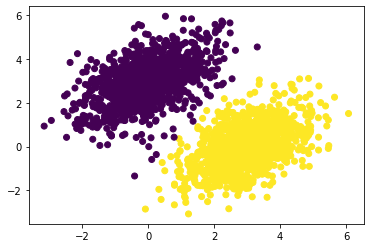

In [11]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

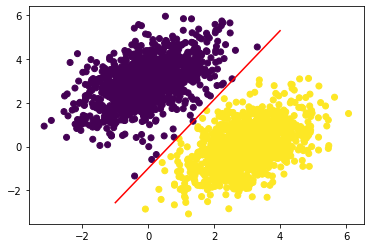

In [13]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()